# Analysis of Pizza data

In [ ]:
#This is a sample list of over 1000 pizzas from multiple restaurants provided by Datafiniti's Business Database.
#The dataset includes the category, name, address, city, state, menu information, price range, and more for each pizza restaurant.

Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

Import the data

In [2]:
pizza_data = pd.read_csv('Datafiniti_Pizza_Restaurants_and_the_Pizza_They_Sell_May19.csv')

In [3]:
pizza_data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,2017-06-30T05:05:40Z,2019-05-01T15:43:09Z,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,...,USD,"2018-05-01T04:25:37.197Z,2018-04-16T04:36:02.3...",NaN,Cheese Pizza,Shotgun Dans Pizza,72120,USD,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,2016-04-02T04:02:49Z,2019-05-01T15:27:50Z,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,...,USD,"2018-03-03T02:38:06.381Z,2018-01-18T20:18:10.0...",NaN,Pizza Cookie,Sauce Pizza Wine,85012,USD,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,2016-03-03T18:39:49Z,2019-05-01T12:52:25Z,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,...,USD,"2018-04-10T07:58:34.585Z,2018-04-21T05:43:21.4...",a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,USD,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,2016-03-29T05:08:59Z,2019-05-01T12:52:20Z,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,...,USD,"2016-10-20T21:50:02Z,2016-03-29T05:08:59Z",NaN,Small Pizza,Hungry Howies Pizza,48071,USD,25,40,MI
4,AVwdaeTtkufWRAb55pSH,2016-03-31T02:34:04Z,2019-05-01T12:50:45Z,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,...,USD,2016-03-31T02:34:04Z,NaN,Pizza Sub,Spartan Pizzeria,21224,USD,0,25,MD


In [4]:
#Checking the data
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
id                    10000 non-null object
dateAdded             10000 non-null object
dateUpdated           10000 non-null object
address               10000 non-null object
categories            10000 non-null object
primaryCategories     10000 non-null object
city                  10000 non-null object
country               10000 non-null object
keys                  10000 non-null object
latitude              10000 non-null float64
longitude             10000 non-null float64
menuPageURL           1679 non-null object
menus.amountMax       10000 non-null float64
menus.amountMin       10000 non-null float64
menus.currency        10000 non-null object
menus.dateSeen        10000 non-null object
menus.description     3718 non-null object
menus.name            10000 non-null object
name                  10000 non-null object
postalCode            9996 non-null object
priceRangeC

In [5]:
#Removing the not so useful data fields from the database.
pizza_new_data = pizza_data.drop(['dateAdded', 'dateUpdated', 'address', 'primaryCategories', 'country', 'keys', 'menus.currency', 'menus.dateSeen', 'menus.description', 'menuPageURL', 'postalCode', 'priceRangeCurrency',], axis=1)

In [6]:
#Checking the new database
pizza_new_data.head()

,id,categories,city,latitude,longitude,menus.amountMax,menus.amountMin,menus.name,name,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,"Pizza,Restaurant,American restaurants,Pizza Pl...",Sherwood,34.832300,-92.183800,7.98,7.98,Cheese Pizza,Shotgun Dans Pizza,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,"Pizza,Pizza Place,Restaurants",Phoenix,33.509266,-112.073044,6.00,6.00,Pizza Cookie,Sauce Pizza Wine,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,"Restaurant,Pizza Place,Restaurants",Cincinnati,39.144883,-84.432685,6.49,6.49,Pizza Blanca,Mios Pizzeria,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,"Pizza,Carry-out food,Pizza Place,Restaurants",Madison Heights,42.516669,-83.106630,5.99,5.99,Small Pizza,Hungry Howies Pizza,25,40,MI
4,AVwdaeTtkufWRAb55pSH,"Pizza,American restaurants,Pizza Place,Pizza e...",Baltimore,39.286630,-76.566984,5.49,5.49,Pizza Sub,Spartan Pizzeria,0,25,MD


In [7]:
pizza_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
id                 10000 non-null object
categories         10000 non-null object
city               10000 non-null object
latitude           10000 non-null float64
longitude          10000 non-null float64
menus.amountMax    10000 non-null float64
menus.amountMin    10000 non-null float64
menus.name         10000 non-null object
name               10000 non-null object
priceRangeMin      10000 non-null int64
priceRangeMax      10000 non-null int64
province           10000 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 937.6+ KB


In [8]:
# drop duplicates
pizza_sub = pizza_new_data.drop_duplicates(subset=['id', 'menus.name'])

pizza_sub.count()

id                 9118
categories         9118
city               9118
latitude           9118
longitude          9118
menus.amountMax    9118
menus.amountMin    9118
menus.name         9118
name               9118
priceRangeMin      9118
priceRangeMax      9118
province           9118
dtype: int64

In [9]:
# count the pizza names : We are trying to find out the most commonly used pizza names.
names_of_pizza = pd.DataFrame(pizza_sub['menus.name'].value_counts().reset_index())
names_of_pizza.columns = ['Pizza name', 'Count']
print(names_of_pizza)

                                 Pizza name  Count
0                              Cheese Pizza    223
1                               White Pizza    187
2                            Hawaiian Pizza    130
3                     Buffalo Chicken Pizza     98
4                          Margherita Pizza     91
5                                     Pizza     91
6                              Veggie Pizza     80
7                         Bbq Chicken Pizza     70
8                              Pizza Burger     65
9                                 Pizza Sub     62
10                              Greek Pizza     62
11                           Sicilian Pizza     58
12                               Taco Pizza     56
13                              Pizza Steak     52
14                              Pizza Bread     48
15                        BBQ Chicken Pizza     46
16                            Lasagna Pizza     44
17                              Pizza Fries     42
18                          Pep

In [10]:
# We are using the top 20 commonly used pizza names.
top_20_names_of_pizza = names_of_pizza.iloc[0:20,:]

In [11]:
top_20_names_of_pizza

,Pizza name,Count
0,Cheese Pizza,223
1,White Pizza,187
2,Hawaiian Pizza,130
3,Buffalo Chicken Pizza,98
4,Margherita Pizza,91
5,Pizza,91
6,Veggie Pizza,80
7,Bbq Chicken Pizza,70
8,Pizza Burger,65
9,Pizza Sub,62


In [80]:
#find current figure size 
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

[15, 9]


In [81]:
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 9

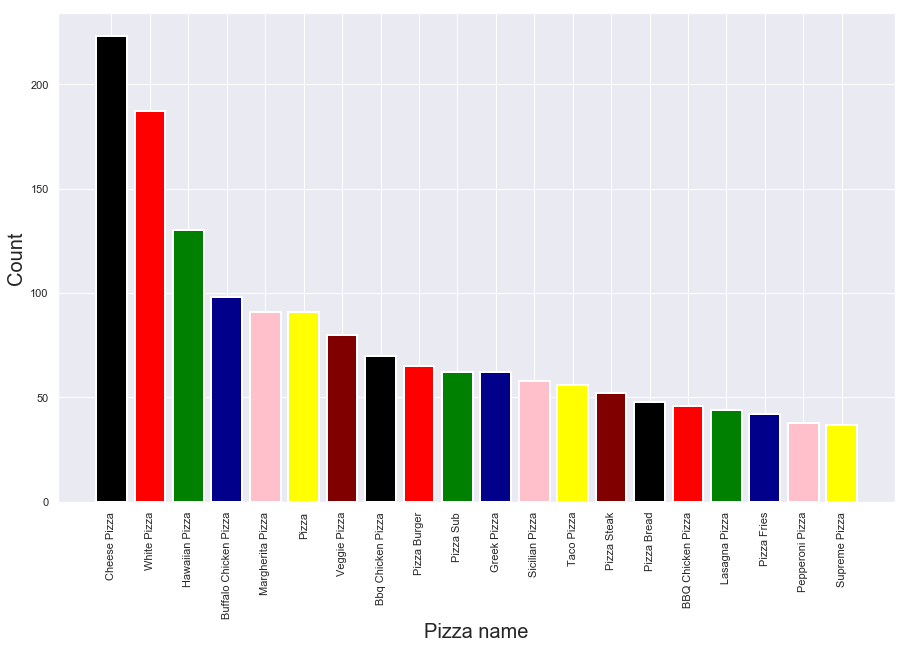

In [82]:
plt.bar( top_20_names_of_pizza['Pizza name'], top_20_names_of_pizza['Count'],  width=0.8, bottom=None,  align='center', linewidth=2, color=['black', 'red', 'green', 'darkblue', 'pink','yellow','maroon'])
plt.xlabel('Pizza name', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation=90)   
plt.show()


Count the number of pizza restaurants by Province:

In [13]:
#Finding out the different provinces and the total count of provinces in the database.
pizza_new_data['province'].unique()

array(['AR', 'AZ', 'OH', 'MI', 'MD', 'CA', 'FL', 'TX', 'NC', 'PA', 'LA',
       'NY', 'IN', 'CO', 'NV', 'IA', 'OK', 'NM', 'WI', 'VA', 'OR', 'MN',
       'TN', 'WA', 'SC', 'MS', 'MO', 'GA', 'IL', 'DE', 'KS', 'UT', 'KY',
       'NE', 'SD', 'WV', 'AL', 'AK', 'ID', 'CT', 'HI', 'NJ', 'ND', 'MT'],
      dtype=object)

In [14]:
pizza_new_data['province'].nunique()

44

In [15]:
#Finding out the distribution of restaurants in different provinces.
pizza_restaurants_by_state = pd.DataFrame(pizza_new_data['province'].value_counts().reset_index())
pizza_restaurants_by_state.columns = ['Province', 'Pizza restaurants']
print(pizza_restaurants_by_state)

   Province  Pizza restaurants
0        NY               2640
1        CA               1386
2        PA                814
3        FL                601
4        TX                485
5        IL                381
6        MI                366
7        OH                324
8        AZ                288
9        WA                262
10       NC                256
11       VA                237
12       IN                219
13       GA                214
14       NV                149
15       WI                140
16       CO                138
17       OR                122
18       MD                118
19       UT                107
20       MN                 96
21       MO                 95
22       SC                 81
23       KY                 77
24       TN                 66
25       IA                 53
26       NM                 46
27       AR                 40
28       KS                 38
29       OK                 27
30       WV                 27
31      

In [16]:
#find current figure size 
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)

[6.0, 4.0]


In [17]:
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 9

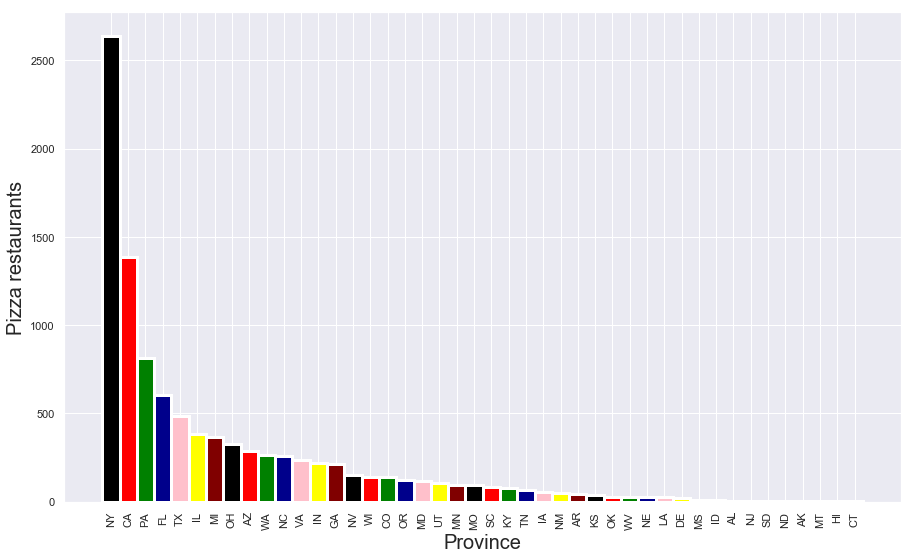

In [18]:
#Bar graph to understand the pizza restaurants distribution across various provinces.
plt.bar( pizza_restaurants_by_state['Province'], pizza_restaurants_by_state['Pizza restaurants'], width=1, bottom=None,  align='center', linewidth=3,color=['black', 'red', 'green', 'darkblue', 'pink','yellow','maroon'])
plt.xlabel('Province', fontsize = 20)
plt.ylabel('Pizza restaurants', fontsize = 20)
plt.xticks(rotation=90)  
plt.show()

In [ ]:
# NY has the maximum number of pizza restaurants.

Finding the price range

In [19]:
#Finding the average price of pizzas in each province
pizza_mean = pizza_new_data.drop_duplicates(['id'])

In [42]:
pizza_prices = pd.DataFrame(pizza_mean.groupby(['province']).mean().reset_index())
pizza_prices  


,province,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax
0,AK,62.541468,-148.904978,20.993333,20.993333,0.000000,25.000000
1,AL,33.212010,-86.349161,4.396667,4.396667,8.333333,30.000000
2,AR,35.461324,-93.361078,8.736154,7.966923,1.923077,26.153846
3,AZ,33.512193,-111.855363,13.870143,13.716571,8.071429,29.928571
4,CA,35.423930,-119.538120,14.866510,14.016745,5.890196,28.560784
5,CO,39.480258,-105.222419,10.924000,10.685250,5.025000,27.975000
6,CT,41.417410,-73.399890,10.950000,10.950000,25.000000,40.000000
7,DE,39.194859,-75.461241,11.782857,11.534286,0.000000,25.000000
8,FL,27.941561,-81.462438,11.462515,10.795399,4.705521,27.809816
9,GA,33.705952,-84.144727,9.487231,9.268000,5.646154,28.384615


In [43]:
pizza_prices['Mean'] =(pizza_prices['menus.amountMax'] + pizza_prices['menus.amountMin'])/2
pizza_prices = pizza_prices.loc[:, ['province', 'menus.amountMax', 'menus.amountMin', 'Mean'] ]
pizza_prices

,province,menus.amountMax,menus.amountMin,Mean
0,AK,20.993333,20.993333,20.993333
1,AL,4.396667,4.396667,4.396667
2,AR,8.736154,7.966923,8.351538
3,AZ,13.870143,13.716571,13.793357
4,CA,14.866510,14.016745,14.441627
5,CO,10.924000,10.685250,10.804625
6,CT,10.950000,10.950000,10.950000
7,DE,11.782857,11.534286,11.658571
8,FL,11.462515,10.795399,11.128957
9,GA,9.487231,9.268000,9.377615


In [44]:
#The highest mean value in the group
pizza_prices['Mean'].max()

21.0

In [45]:
#The lowest mean value in the group
pizza_prices['Mean'].min()

4.3966666666666665

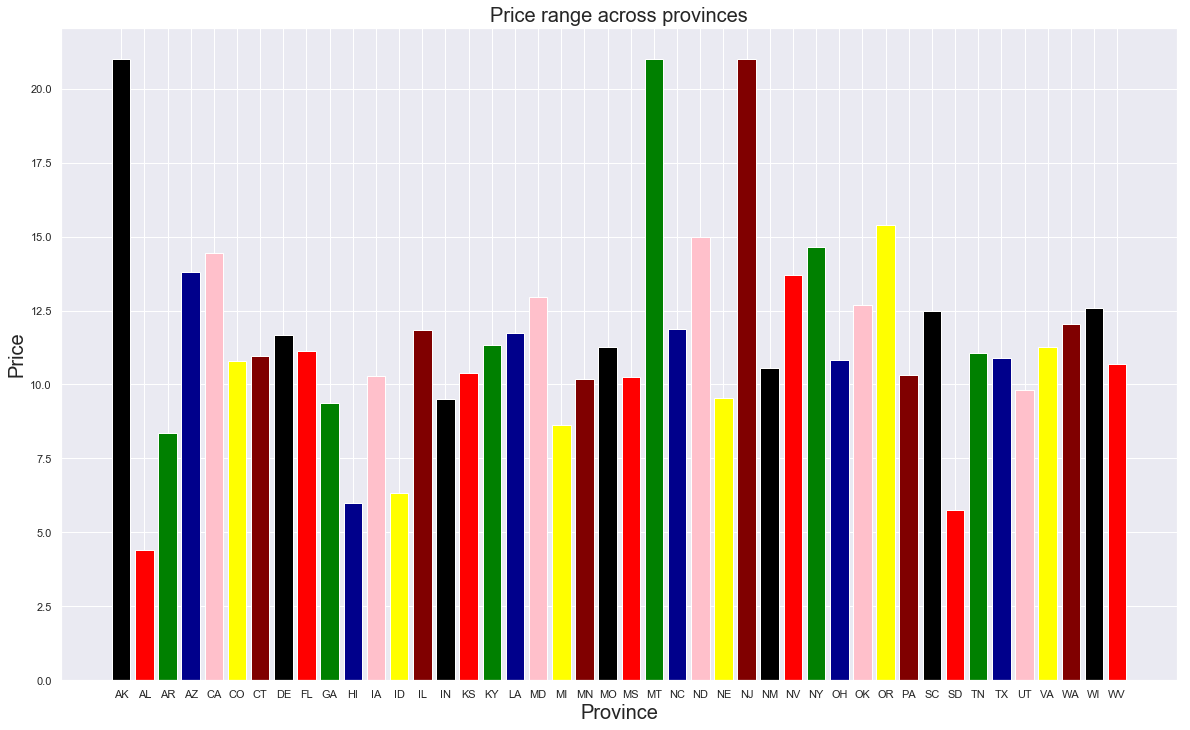

In [89]:
#The bar graph showing the distribution of mean price value across various provinces
plt.bar(pizza_prices['province'], pizza_prices['Mean'], width =0.8, bottom=None, color=['black', 'red', 'green', 'darkblue', 'pink','yellow','maroon'])
plt.title('Price range across provinces', fontsize = 20)
plt.xlabel('Province', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

In [47]:
#It is also useful to know the median of pizza prices. It gives us a better picture of the distribution.
pizza_prices_mode = pd.DataFrame(pizza_mean.groupby(['province']).median().reset_index())
pizza_prices_mode = pizza_prices_mode.loc[:, ['province', 'menus.amountMax', 'menus.amountMin'] ]
pizza_prices_mode  

,province,menus.amountMax,menus.amountMin
0,AK,21.000,21.000
1,AL,4.250,4.250
2,AR,9.390,7.980
3,AZ,12.025,12.025
4,CA,12.000,11.500
5,CO,10.245,9.985
6,CT,10.950,10.950
7,DE,12.500,12.500
8,FL,11.000,9.990
9,GA,8.990,8.990


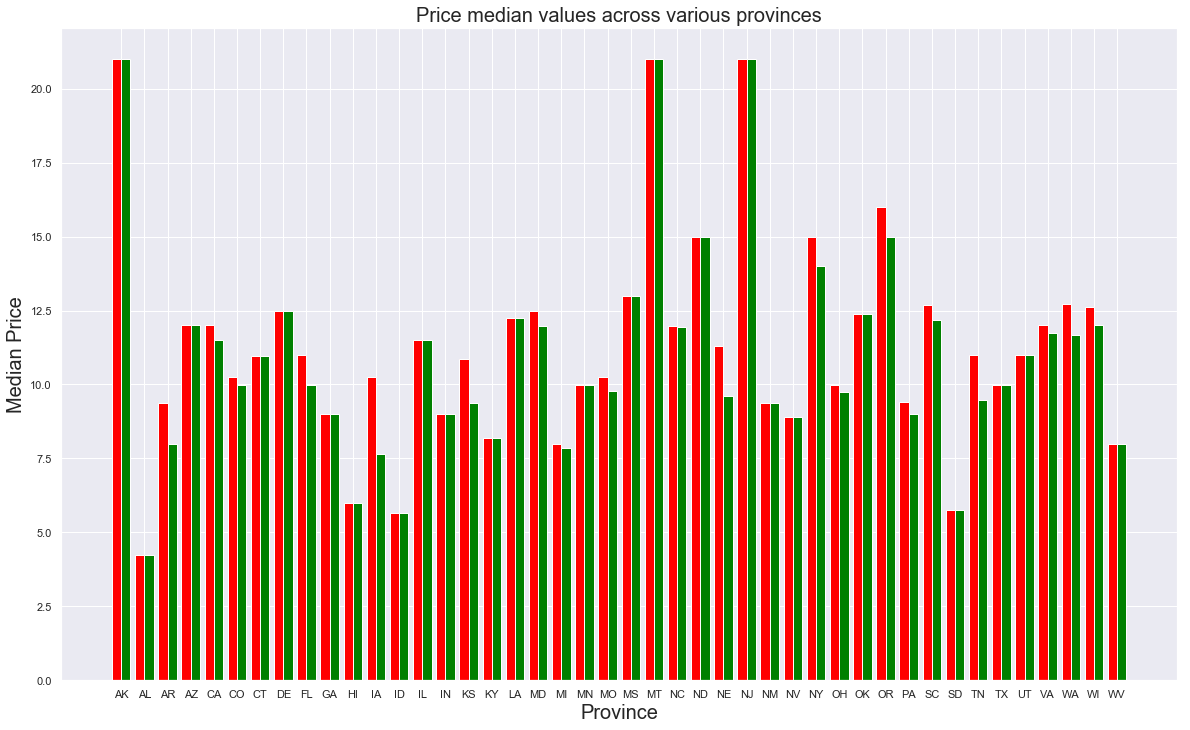

In [84]:
# Set figure width to 20 and height to 12
fig_size[0] = 20
fig_size[1] = 12
#The bar graph showing the distribution of median price value across various provinces
width =0.8 #width of the bars
#x = len((pizza_prices_mode['province'])
plt.bar(pizza_prices_mode['province'], pizza_prices_mode['menus.amountMax'], width = -width/2, bottom=None, align = 'edge', color=['red'])
plt.bar(pizza_prices_mode['province'], pizza_prices_mode['menus.amountMin'], width = width/2, bottom=None, align = 'edge', color=['green'])
plt.title('Price median values across various provinces', fontsize = 20)
plt.xlabel('Province', fontsize = 20)
plt.ylabel('Median Price', fontsize = 20)
plt.show()

There is not much difference between mean and median values. So we can safely consider the mean values of this dataset. Provinces AK, MT and NJ have the highest value at $ 21. So we can say that pizzas sold here will cost more in these provinces when compared to the other provinces. Province 'AL' has the lowest value at $ 4.39, hence the pizzas are priced lowest in this province.  